In [4]:
import os
import sys
sys.path.insert(0, "/home/qiyuan/sp/mitsuba3/build/python")

import mitsuba as mi
import drjit as dr

from typing import Union
import matplotlib.pyplot as plt
import numpy as np


print("Loaded Mitsuba from: ", os.path.dirname(mi.__file__))
print("Loaded Mitsuba from: ", os.path.dirname(dr.__file__))

mi.set_variant("cuda_ad_rgb")

scene_path = "/home/qiyuan/sp/mitsuba3/notebooks/bspline_curve.xml"
scene = mi.load_file(scene_path)

Loaded Mitsuba from:  /home/qiyuan/sp/mitsuba3/build/python/mitsuba
Loaded Mitsuba from:  /home/qiyuan/sp/mitsuba3/build/python/drjit


2022-11-11 10:33:43 INFO main [xml.cpp:1405] Loading XML file "/home/qiyuan/sp/mitsuba3/notebooks/bspline_curve.xml" with variant "cuda_ad_rgb"..

2022-11-11 10:33:43 INFO main [Scene] Building scene in OptiX ..

2022-11-11 10:33:43 DEBUG main [shapes.h:116] Build_single_gas for shape Sphere

2022-11-11 10:33:43 DEBUG main [shapes.h:145] OptiXAccelBufferSizes tempSizeInBytes:1408 outputSizeInBytes:1024 tempUpdateSizeInBytes:0

2022-11-11 10:33:43 DEBUG main [Scene] ias.size() == 1

2022-11-11 10:33:43 INFO main [Scene] OptiX ready. (took 5ms)

2022-11-11 10:33:43 INFO main [xml.cpp:1422] Done loading XML file "/home/qiyuan/sp/mitsuba3/notebooks/bspline_curve.xml" (took 21ms).

2022-11-11 10:33:43 DEBUG main [Scene] Free OptiX IAS..

In [5]:
image = mi.render(scene, spp=16)

2022-11-11 10:33:46 INFO main [SamplingIntegrator] Starting render job (1024x768, 16 samples)

2022-11-11 10:33:46 INFO main [SamplingIntegrator] Computation graph recorded. (took 2ms)

4.9096484


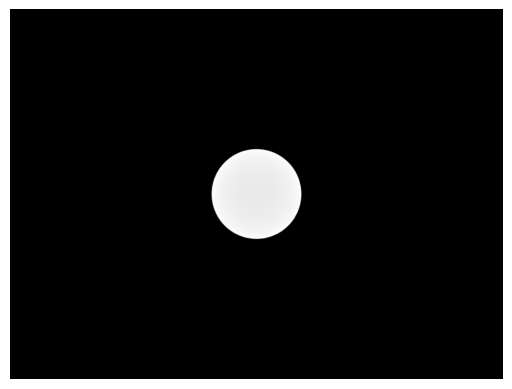

In [6]:
img_np = np.array(image)
print(img_np.max())
plt.axis("off")
plt.imshow(img_np / img_np.max()); # approximate sRGB tonemapping

In [ ]:
mi.util.write_bitmap("./bspline_mitsuba_optix_t_far.exr", image / 10.0)